In [5]:
import ATS_Analysis as ats
import pandas as pd
import numpy as np

%matplotlib inline

In [22]:
df = ats.get_data(['P110', 'P112', 'P113', 'P114', 'P115', 'P116', 'P117'], 10)

P110 95 33 27
P112 23 7 7
P113 88 35 29
P114 51 13 13
P115 77 10 9
P116 8 5 5
P117 56 41 41


In [23]:
df.head()

,RASS,patientID,ds_rolling,tot_rolling,ds_freq
2014-10-16 16:30:00,-2,NaN,87,170,0.511765
2014-10-16 20:00:00,-2,NaN,108,176,0.613636
2014-10-17 00:00:00,-2,NaN,53,177,0.299435
2014-10-17 04:00:00,-2,NaN,96,180,0.533333
2014-10-17 07:45:00,-2,NaN,103,186,0.553763


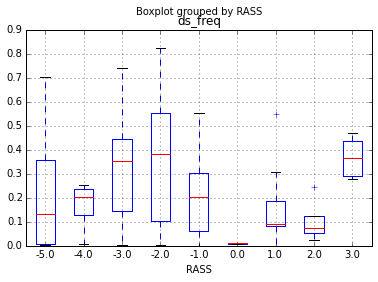

In [49]:
pd.DataFrame.boxplot(df, column='ds_freq', by='RASS')

C:\Users\sottilep\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


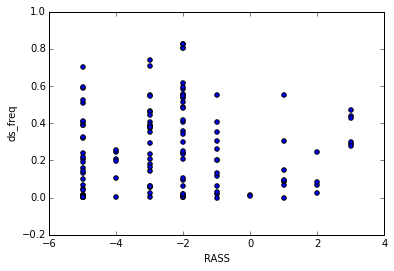

In [50]:
df.plot(kind='scatter', x='RASS', y='ds_freq')